<h2>gradient descent method for linear regression</h2>

In [1]:
import numpy as np
from matplotlib import pyplot as plt

Here, we review the relevant formulas.

    y_pred = np.dot(X, beta) + b
    loss = float(np.dot((y - np.dot(X, beta) - b).T, y - np.dot(X, beta) - b) / y.size)

    grad_beta = - 2 * np.dot(X.T, y - np.dot(X, beta) - b) / y.size
    grad_b = - 2 * np.sum(y - np.dot(X, beta) - b) / y.size

    beta, b = beta - grad_beta * learning_rate, b - grad_b * learning_rate

In [2]:
def pred(X, beta, b):
    return np.dot(X, beta) + b

def mse(X, y, beta, b):
    return float(np.dot((y - np.dot(X, beta) - b).T, y - np.dot(X, beta) - b) / y.size)

def grad_descent(X, y, n_steps, learning_rate):
    n, k = X.shape
    beta = np.random.rand(k, 1)
    b = np.random.rand()
    for step in range(n_steps):
        grad_beta = - 2 * np.dot(X.T, y - np.dot(X, beta) - b) / n
        grad_b = - 2 * np.sum(y - np.dot(X, beta) - b) / n
        beta, b = beta - grad_beta * learning_rate, b - grad_b * learning_rate
    return beta, b

In [3]:
y = np.array([1,2,3,4,5,6])
y = y.reshape((6,1))
X = np.array([[1,10],[1.4, 10.3],[2,11],[2.5, 11.5],[3,12],[3.6,12.7]])

beta, b = grad_descent(X, y, 5000, 0.001)
print('beta: \n{}\n\n'.format(beta))
print('b: \n{}\n\n'.format(b))
y_pred = pred(X, beta, b)
print('y_pred: \n{}\n\n'.format(y_pred))
loss = mse(X, y, beta, b)
print('loss: \n{}'.format(loss))

beta: 
[[ 2.03446622]
 [-0.13098808]]


b: 
0.3967183908942305


y_pred: 
[[1.12130377]
 [1.89579383]
 [3.0247819 ]
 [3.97652097]
 [4.92826004]
 [6.05724811]]


loss: 
0.005860484305225442


In [4]:
def grad_descent_with_loss_history(X, y, n_steps, learning_rate):
    n, k = X.shape
    beta = np.random.rand(k, 1)
    b = np.random.rand()
    history = []
    for step in range(n_steps):
        grad_beta = - 2 * np.dot(X.T, y - np.dot(X, beta) - b) / n
        grad_b = - 2 * np.sum(y - np.dot(X, beta) - b) / n
        beta, b = beta - grad_beta * learning_rate, b - grad_b * learning_rate
        history.append(mse(X, y, beta, b))
    return beta, b, np.array(history)

beta: 
[[ 2.04657013]
 [-0.14173976]]


b: 
0.49036966432355633




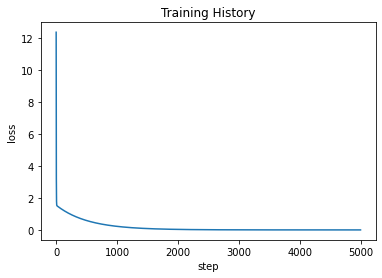

In [5]:
y = np.array([1,2,3,4,5,6])
y = y.reshape((6,1))
X = np.array([[1,10],[1.4, 10.3],[2,11],[2.5, 11.5],[3,12],[3.6,12.7]])

beta, b, the_history = grad_descent_with_loss_history(X, y, 5000, 0.001)
print('beta: \n{}\n\n'.format(beta))
print('b: \n{}\n\n'.format(b))

plt.title("Training History") 
plt.xlabel("step") 
plt.ylabel("loss") 
plt.plot(the_history)
plt.show()